https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
def plotear_clasificador(clf):
    
    clf.fit(df_train[["feature1","feature2"]], df_train["label"])
    title = clf.score(df[["feature1","feature2"]], df["label"])
        
    plt.scatter(df_test["feature1"],df_test["feature2"], c = clf.predict(df_test[["feature1","feature2"]]))
    plt.title(title)
    plt.show()

In [3]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=10, random_state=1, max_depth = 2)
clf3 = LinearSVC( tol = 10) #max_iter = 10*10,

In [4]:
num_datos = 1000
scale = 1.5

In [5]:
datos1 = np.hstack([np.random.normal(loc = 2, size = (num_datos,1), scale=scale ),
                    np.random.normal(loc = 0, size = (num_datos,1), scale=scale )])

datos2 = np.random.normal(loc = 4, size = (num_datos,2), scale=scale )

datos3 = np.hstack([np.random.normal(loc = 0, size = (num_datos,1), scale=scale ),
                    np.random.normal(loc = 4, size = (num_datos,1), scale=scale )])

datos4 = np.hstack([np.random.normal(loc = 2, size = (num_datos,1), scale=scale ),
                    np.random.normal(loc = 6, size = (num_datos,1), scale=scale )])

datos = np.vstack([datos1, datos2, datos3, datos4])

In [6]:
df = pd.DataFrame(datos, columns = ["feature1","feature2"])

labels = [0]*num_datos + [1]*num_datos + [2]*num_datos + [3]*num_datos
df["label"] = labels

In [7]:
df_train, df_test = train_test_split(df)

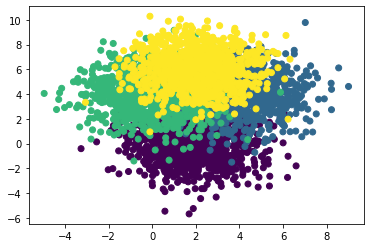

In [8]:
plt.scatter(datos[:,0], datos[:,1], c = labels)
plt.show()

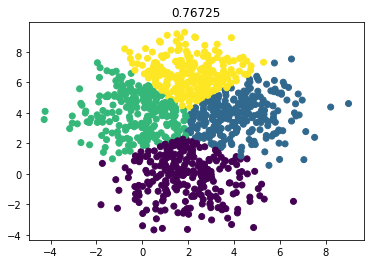

In [9]:
plotear_clasificador(clf1)

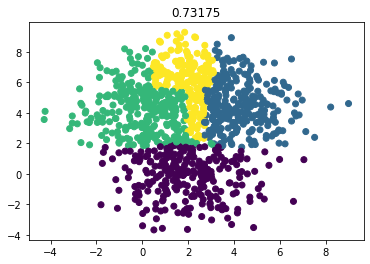

In [10]:
plotear_clasificador(clf2)

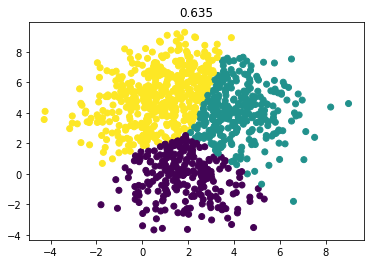

In [11]:
plotear_clasificador(clf3)

In [12]:
eclf1 = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)],
    voting='hard')

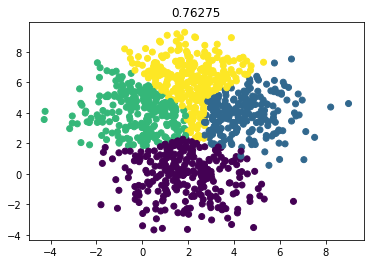

In [13]:
plotear_clasificador(eclf1)

In [14]:
param_grid = {"rf__max_depth":[1,2,3,4,5,6], "lr__C": np.logspace(-4,0,10),"svc__C": np.logspace(-4,0,10)}

grid = GridSearchCV(eclf1, param_grid = param_grid, n_jobs = -1)

In [16]:
grid

GridSearchCV(estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(multi_class='multinomial',
                                                                        random_state=1)),
                                                    ('rf',
                                                     RandomForestClassifier(max_depth=2,
                                                                            n_estimators=10,
                                                                            random_state=1)),
                                                    ('svc',
                                                     LinearSVC(tol=10))]),
             n_jobs=-1,
             param_grid={'lr__C': array([1.00000000e-04, 2.78255940e-04, 7.74263683e-04, 2.15443469e-03,
       5.99484250e-03, 1.66810054e-02, 4.64158883e-02, 1.29154967e-01,
       3.59381366e-01, 1.00000000e+00]),
                         'rf__max_depth':

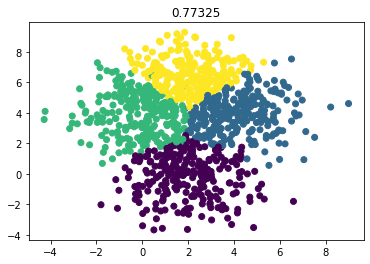

In [15]:
plotear_clasificador(grid)